<a href="https://colab.research.google.com/github/mishelks/campusrecruitprediction/blob/main/Campus_recruitment_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAMPUS RECRUITMENT PREDICTION

IMPORTING LIBRARIES

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/train.csv")

# Display basic dataset information
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nFirst Few Rows:")
print(df.head())





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB
None

Dataset Description:
            sl_no      gen

Data Preprocessing

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


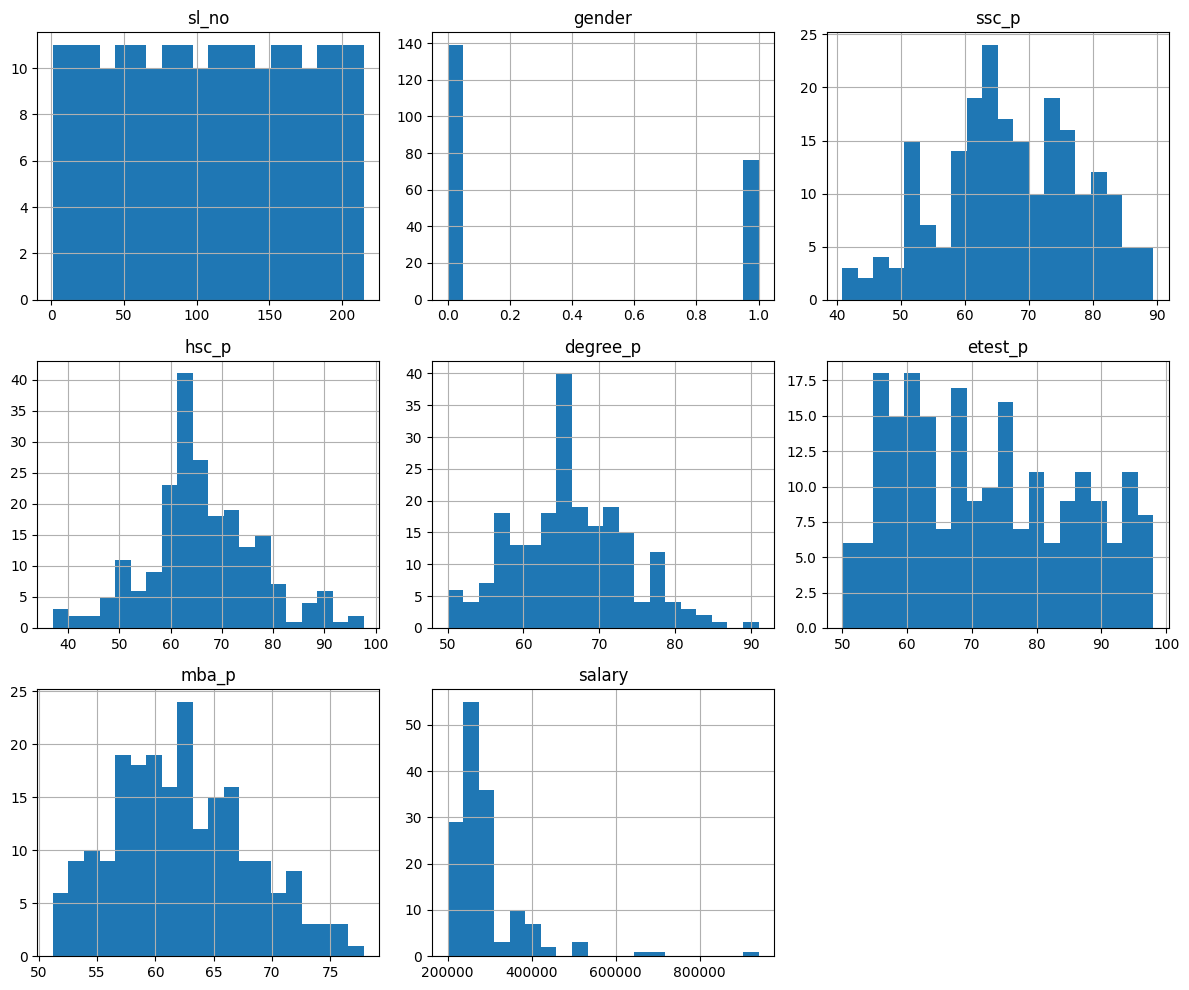

In [ ]:

# Visualize distributions of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

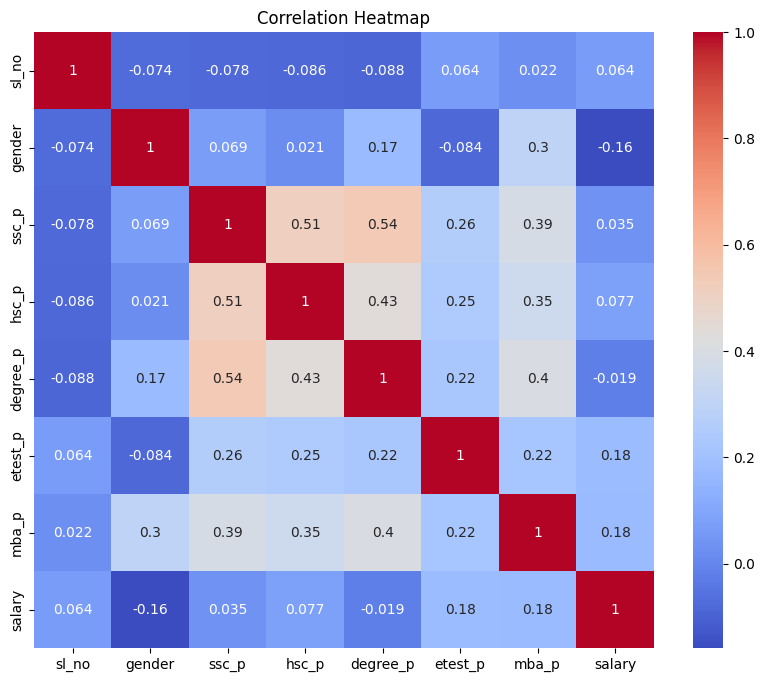

In [ ]:
# Correlation heatmap
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)  # Select numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")  # Use numerical_df
plt.title("Correlation Heatmap")
plt.show()

HANDLING MISSING VALUES

In [ ]:
# Fill or drop missing values
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum())

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


<ipython-input-8-13a8d0278256>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


ENCODE CATEGORICAL VALUES

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,250000.0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


TRAIN TEST SPLIT

In [ ]:
# Feature-target split
X = df.drop("status", axis=1)
y = df["status"]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 14) (65, 14) (150,) (65,)


MODEL SELECTION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}




MODEL TRAINING

In [ ]:
# Train and evaluate each model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name}:\nAccuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.8000
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65


Random Forest:
Accuracy: 0.8154
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.52      0.65        21
           1       0.81      0.95      0.88        44

    accuracy                           0.82        65
   macro avg       0.83      0.74      0.76        65
weighted avg       0.82      0.82      0.80        65


XGBoost:
Accuracy: 0.8462
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       0.84      0.95      0.89        44

    accurac

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:27:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


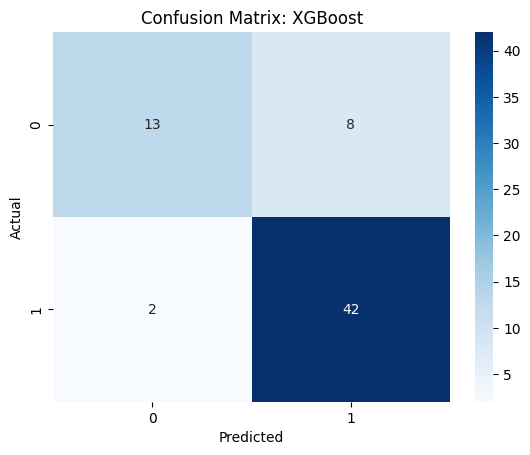

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


MODEL EVALUATION

Best Random Forest Model Accuracy: 0.8000


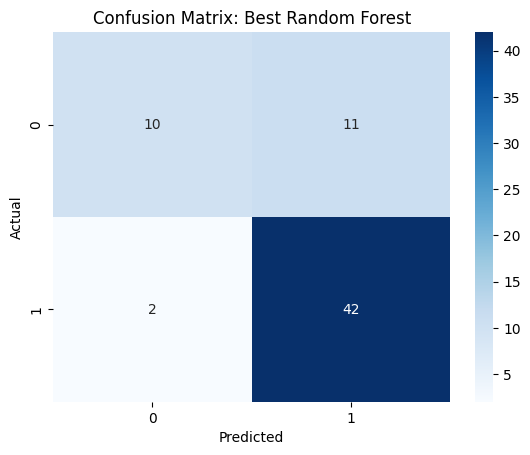

In [ ]:
# Evaluate best Random Forest model
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Random Forest Model Accuracy: {accuracy_best:.4f}")

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Best Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


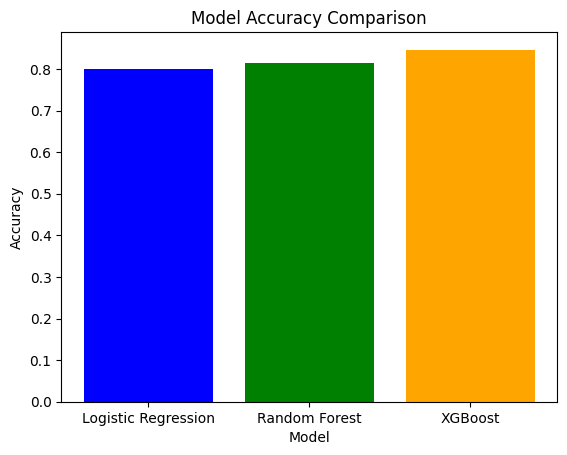

In [ ]:
# Bar plot for accuracy comparison
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


VOTING CLASSIFIER

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost'])
], voting='hard')

voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:28:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.8308


SAVING MODEL

In [ ]:
import pickle

# Save the trained model
with open("campus_placement_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully.")


Model saved successfully.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train contains your training data features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler to the training data


StandardScaler()

In [ ]:
# Save the scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)



load and use model

In [ ]:
# Load the scaler
with open("scaler.pkl", "rb") as file:
    loaded_scaler = pickle.load(file)

# Load the model
with open("campus_placement_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


In [ ]:
import numpy as np


new_data = np.array([[70, 80, 75, 1, 0, 0,0,0,0,0,0,0,0,0]])



scaled_data = loaded_scaler.transform(new_data)  # Scale the new data

# Predict
prediction = loaded_model.predict(scaled_data)
print("Placement Prediction:", "Placed" if prediction[0] == 1 else "Not Placed")

Placement Prediction: Not Placed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
